In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)
addArchRGenome("mm10")

Setting default number of Parallel threads to 10.

Setting default genome to Mm10.



In [3]:
PROJDIR='../../../data/raw_data/mm10/BICCN_mouse_caudoputamen'
ARCHDIR=file.path(PROJDIR,'ArchR_BICCN_CP1')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

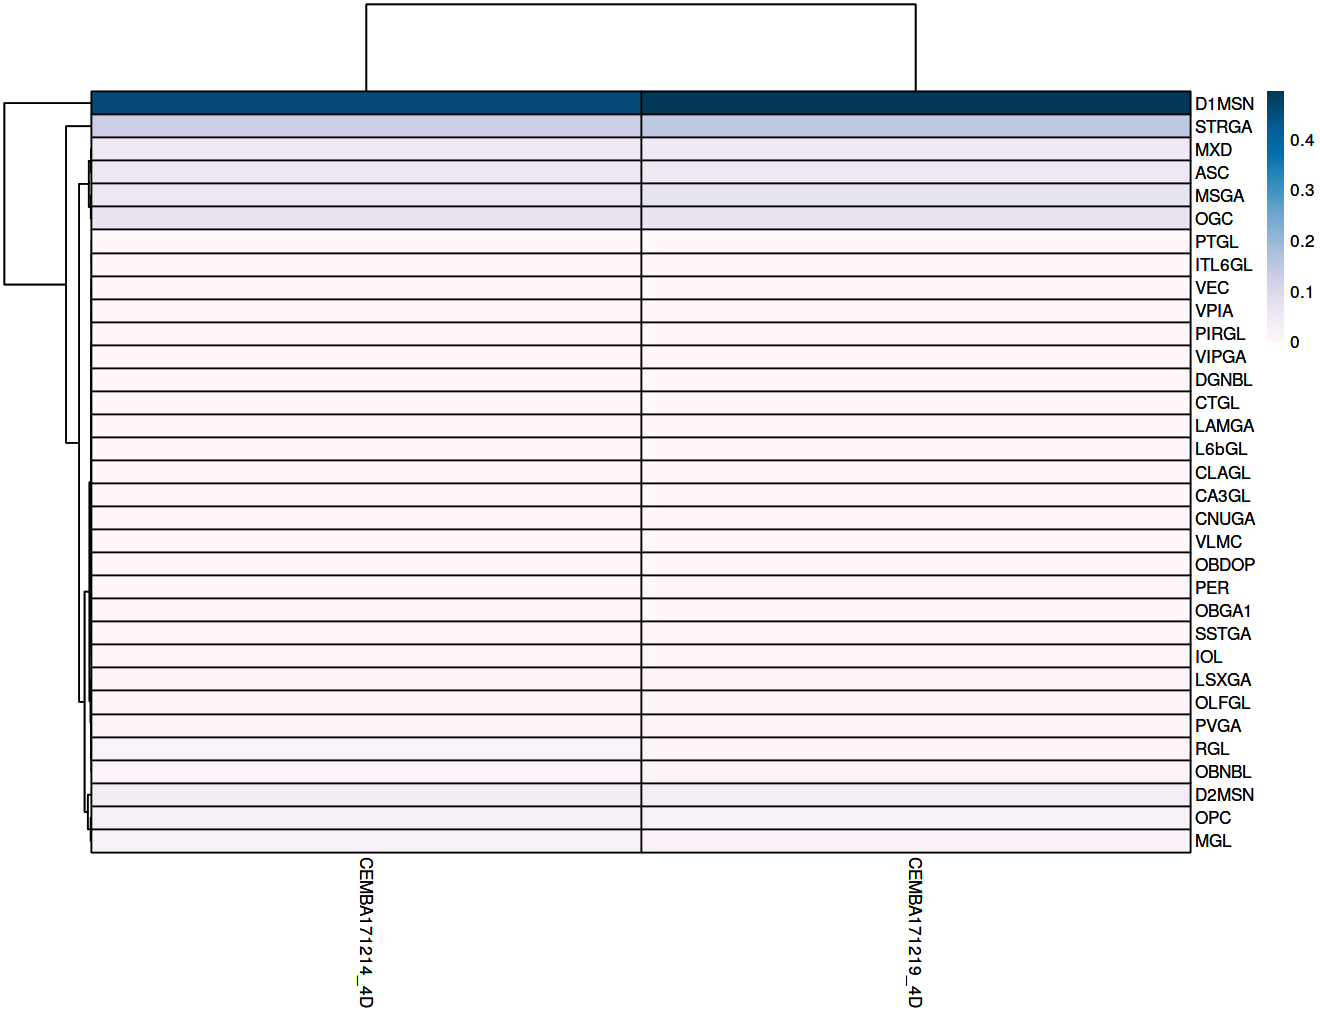

In [4]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$L2cluster), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f472827563-Date-2021-01-30_Time-17-27-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f472827563-Date-2021-01-30_Time-17-27-13.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f445bfc35c-Date-2021-01-30_Time-17-27-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f445bfc35c-Date-2021-01-30_Time-17-27-15.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f43d163a69-Date-2021-01-30_Time-17-27-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : Arch

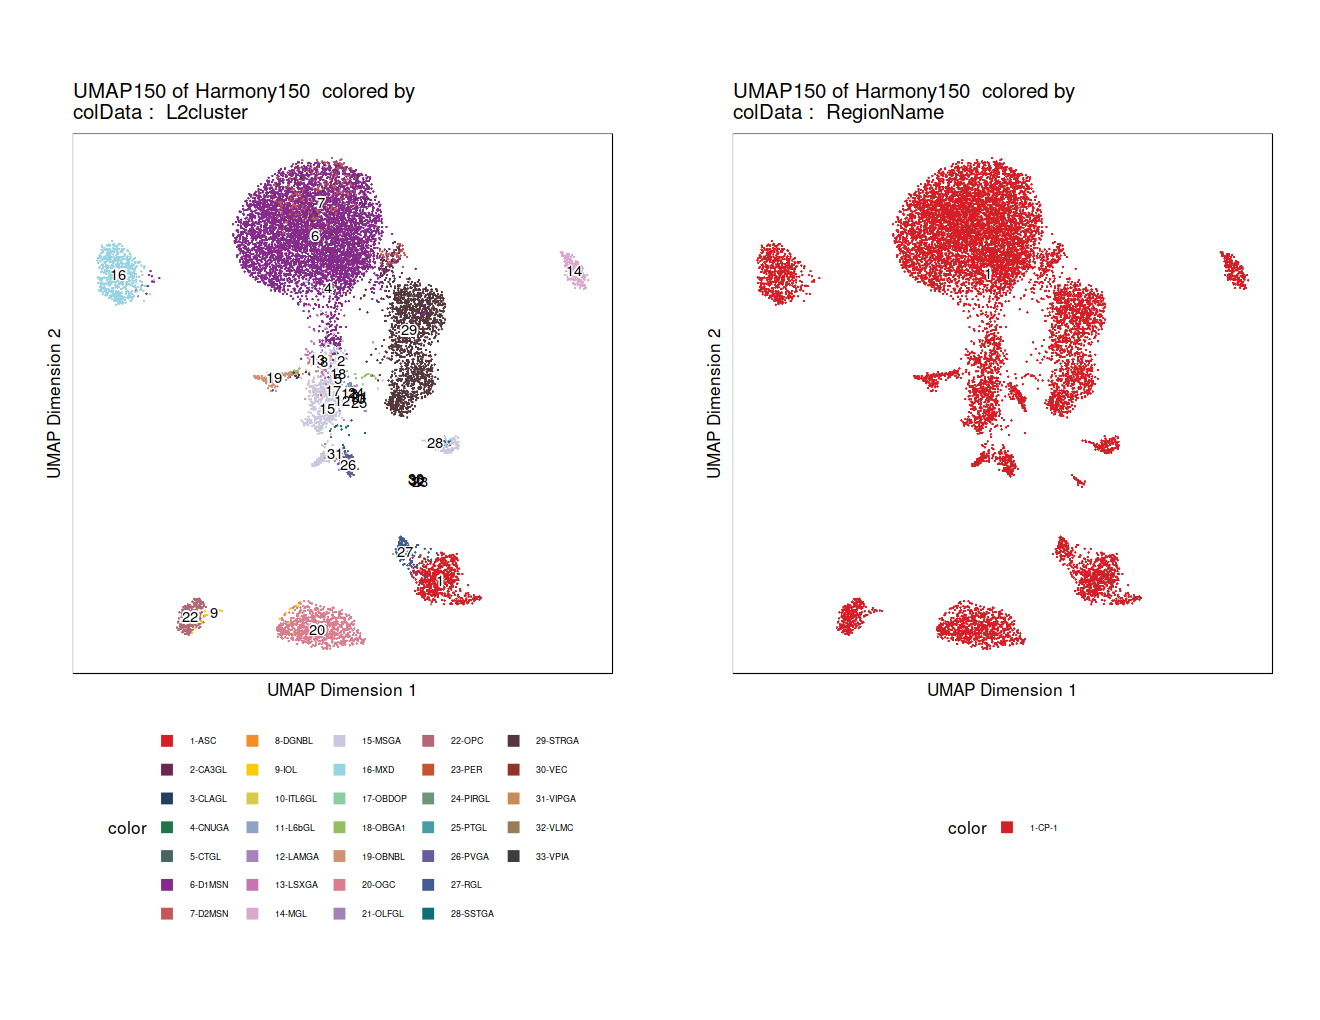

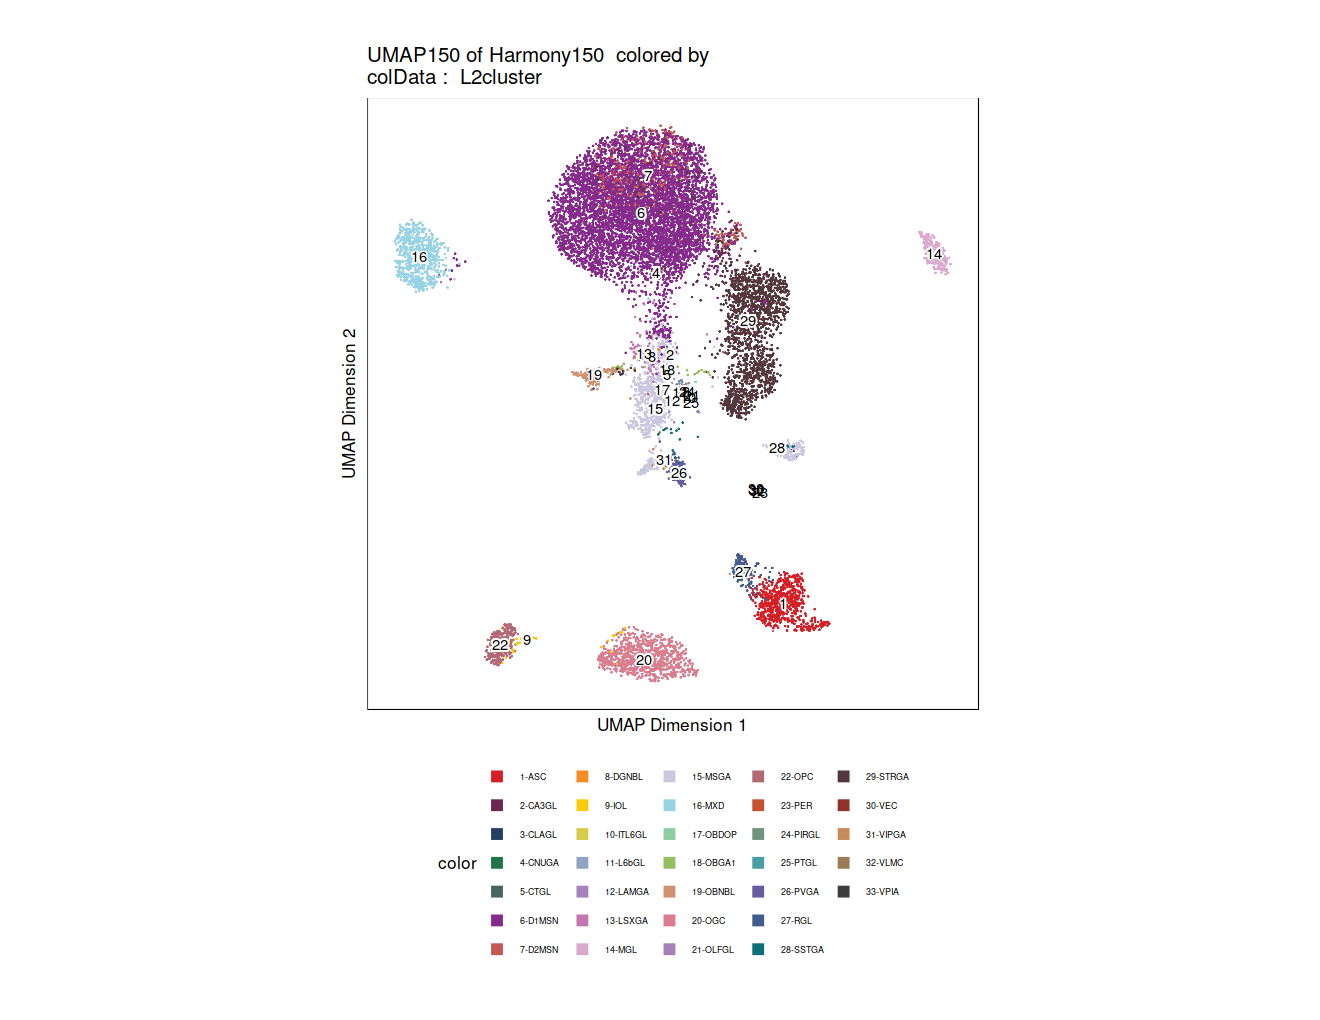

In [6]:
## make UMAP150 plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "L2cluster", embedding = "UMAP150")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "RegionName", embedding = "UMAP150")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAP150")
ggAlignPlots(p1, p2, type = "h")
p1

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f44698787a-Date-2021-01-30_Time-17-29-49.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f44698787a-Date-2021-01-30_Time-17-29-49.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f46ec0db7d-Date-2021-01-30_Time-17-29-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f46ec0db7d-Date-2021-01-30_Time-17-29-50.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f46c98e413-Date-2021-01-30_Time-17-29-54.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f46c98e413-Date-2021-01-30_Time-17-

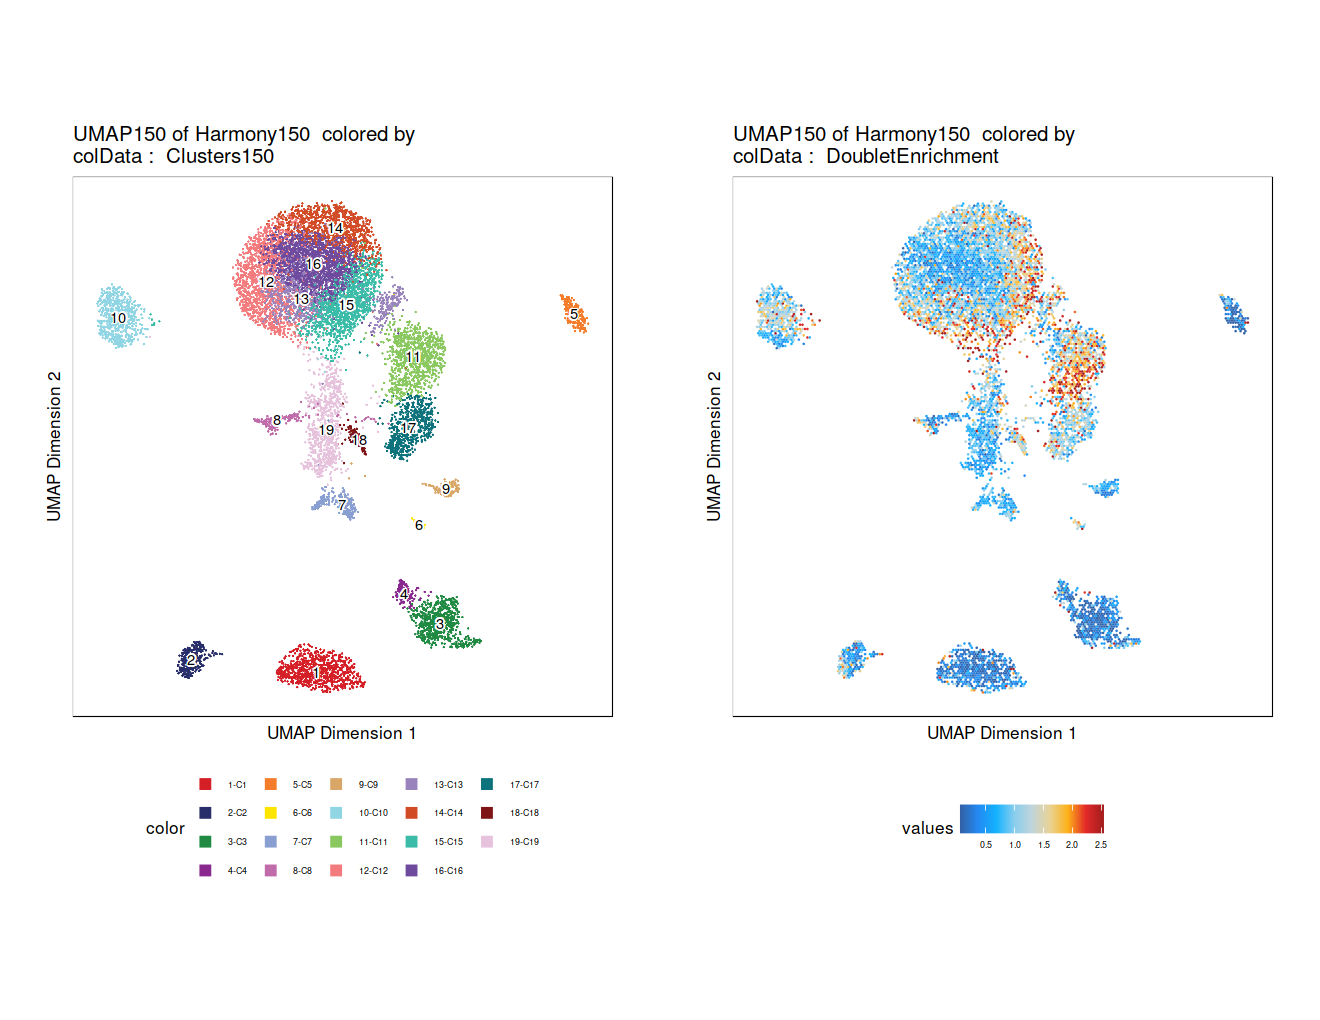

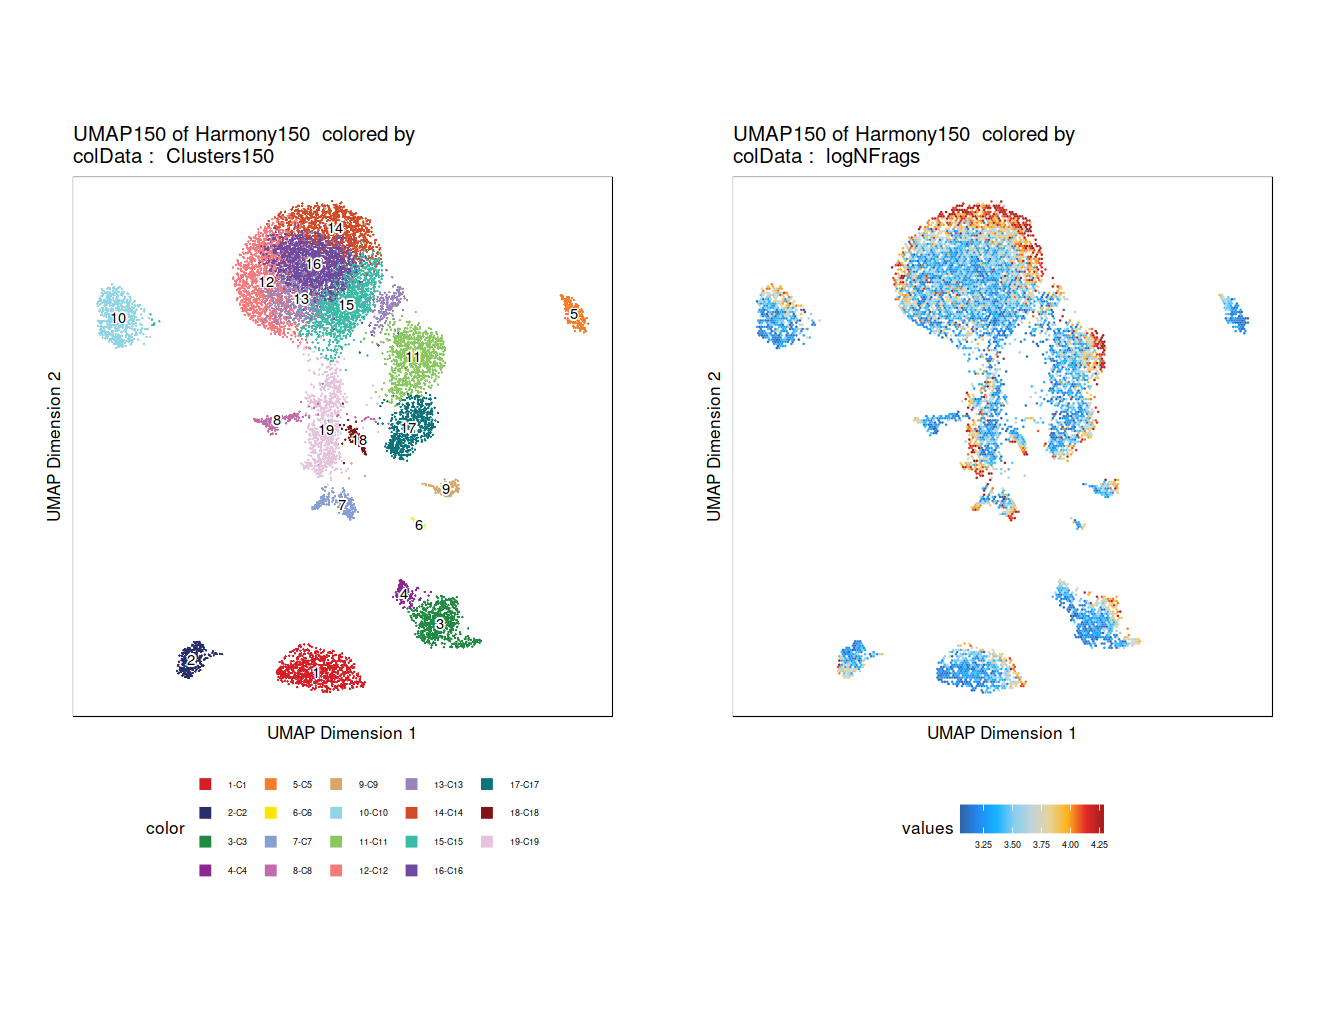

In [12]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters150", embedding = "UMAP150")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP150")

ggAlignPlots(p1, p2, type = "h")
proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAP150")

ggAlignPlots(p1, p3, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f4e0c619a-Date-2021-01-30_Time-17-27-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 17:27:44 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f4e0c619a-Date-2021-01-30_Time-17-27-44.log



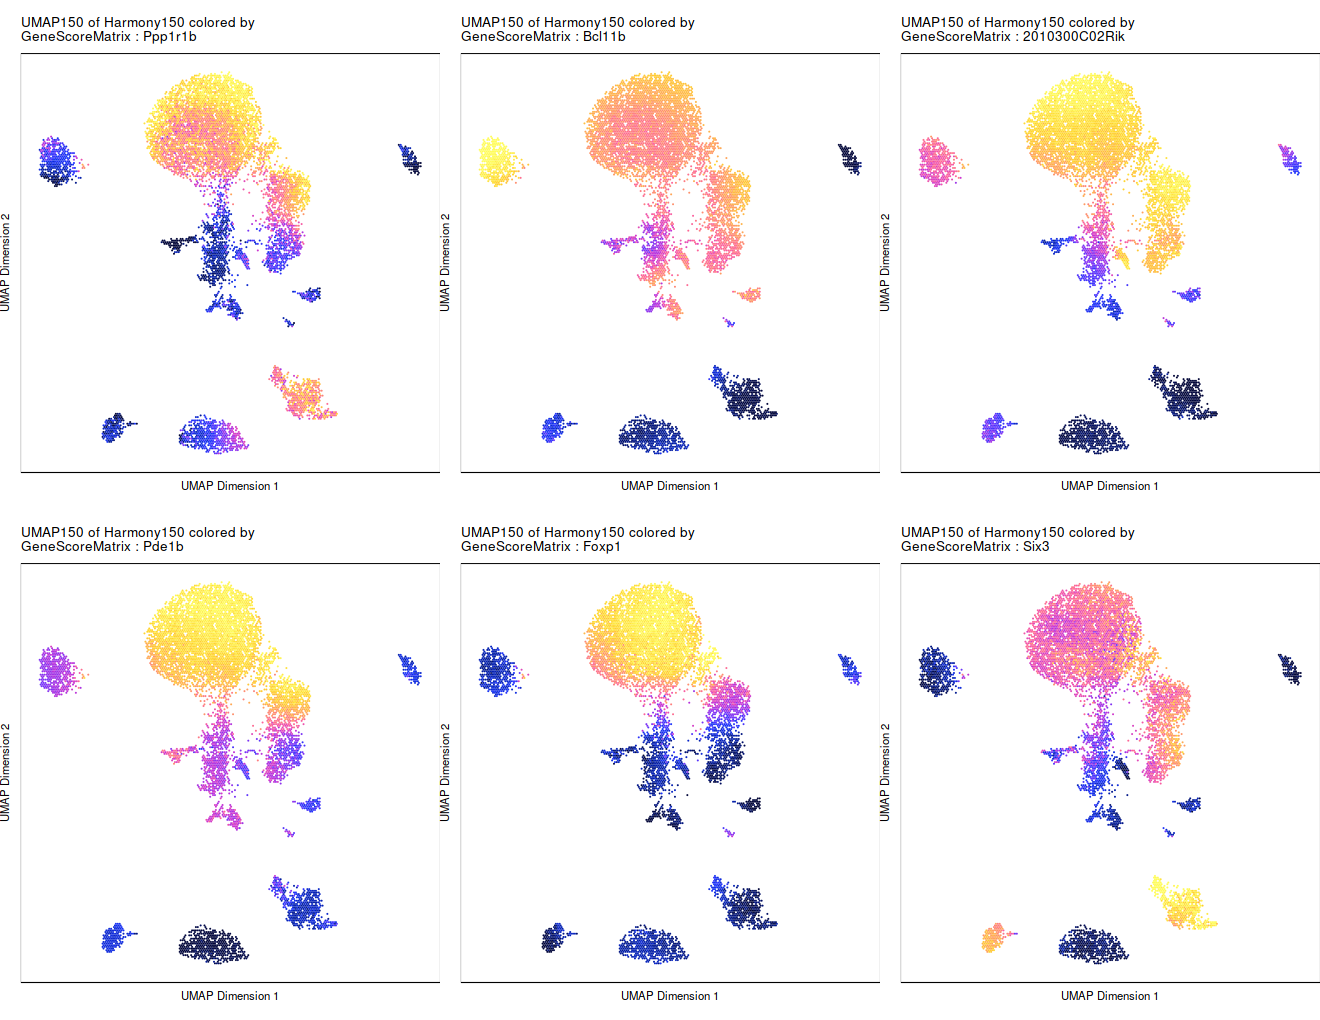

In [7]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','2010300C02Rik','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP150", imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f4562b8290-Date-2021-01-30_Time-17-28-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 17:28:20 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f4562b8290-Date-2021-01-30_Time-17-28-19.log



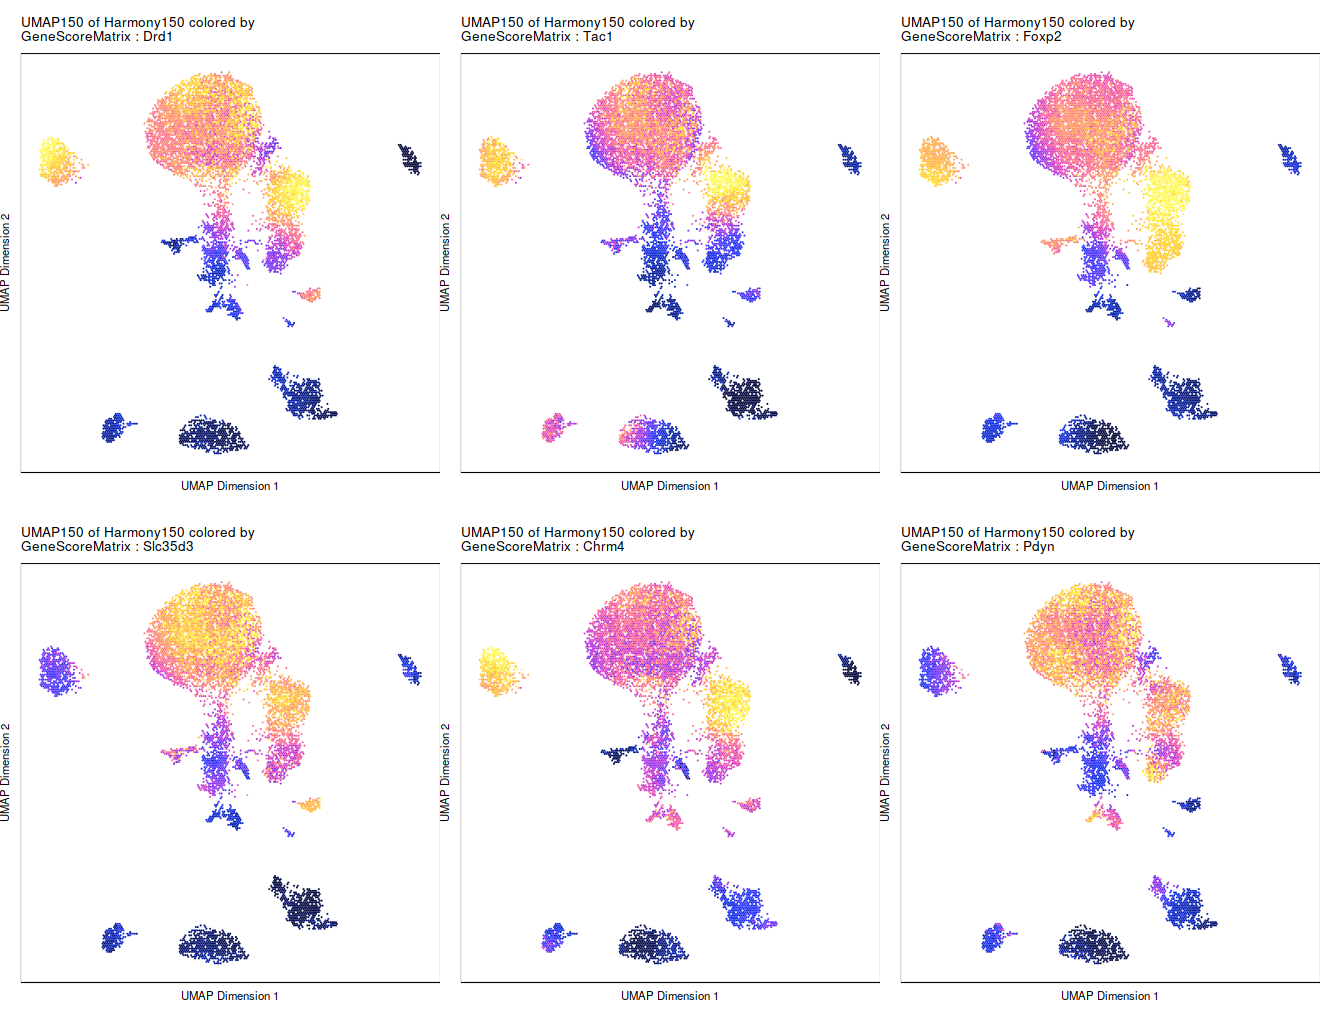

In [8]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn' D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP150", imputeWeights = NULL)
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f4462fce70-Date-2021-01-30_Time-17-28-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 17:28:31 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f4462fce70-Date-2021-01-30_Time-17-28-31.log



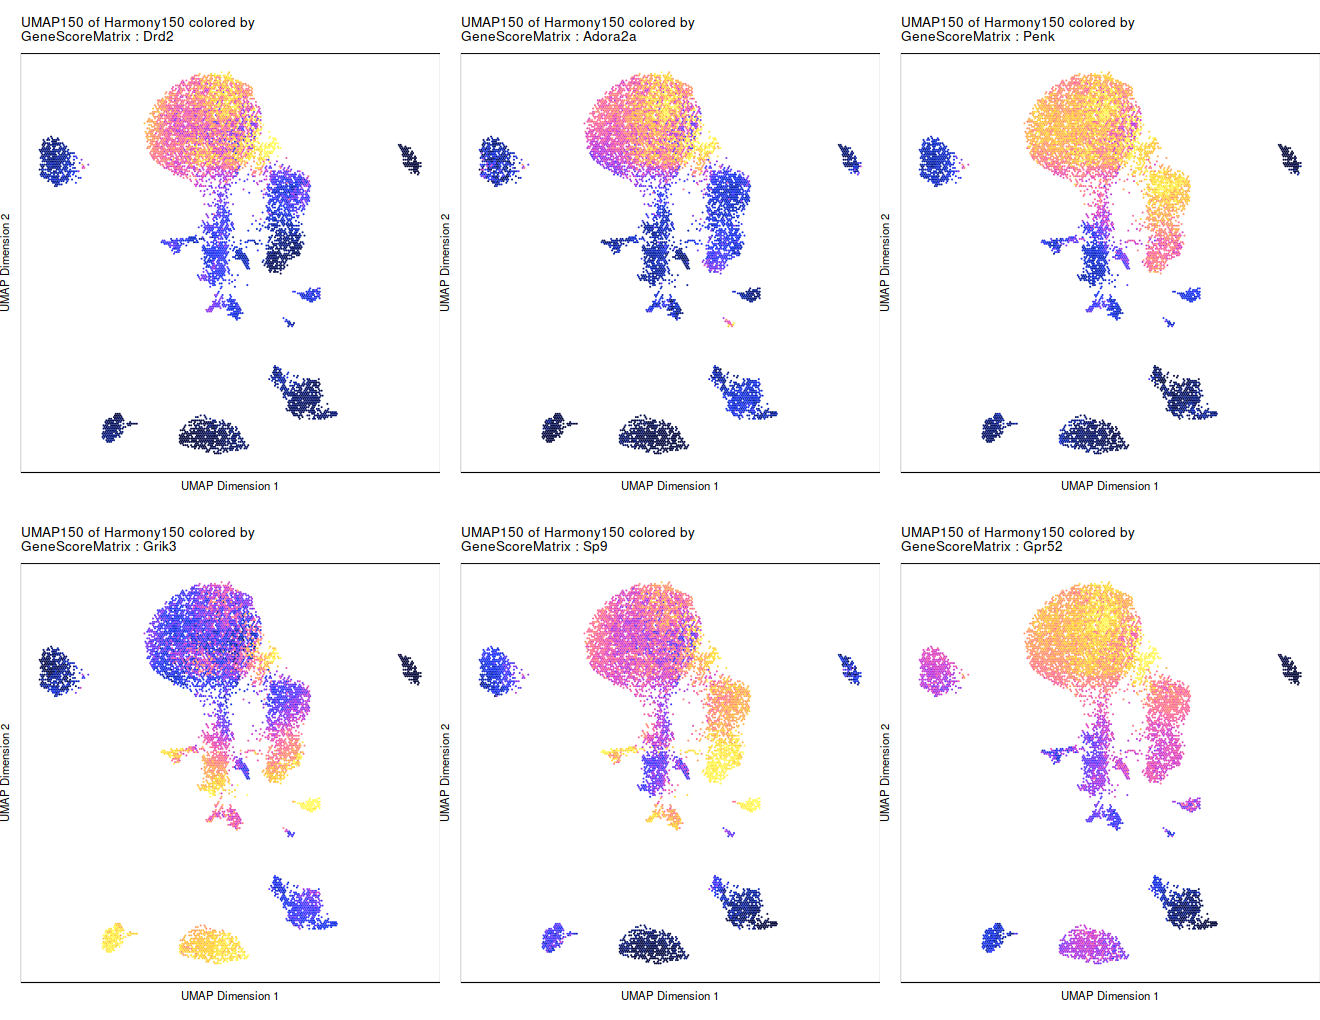

In [9]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP150", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f46f6e9170-Date-2021-01-30_Time-17-28-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 17:28:43 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f46f6e9170-Date-2021-01-30_Time-17-28-43.log



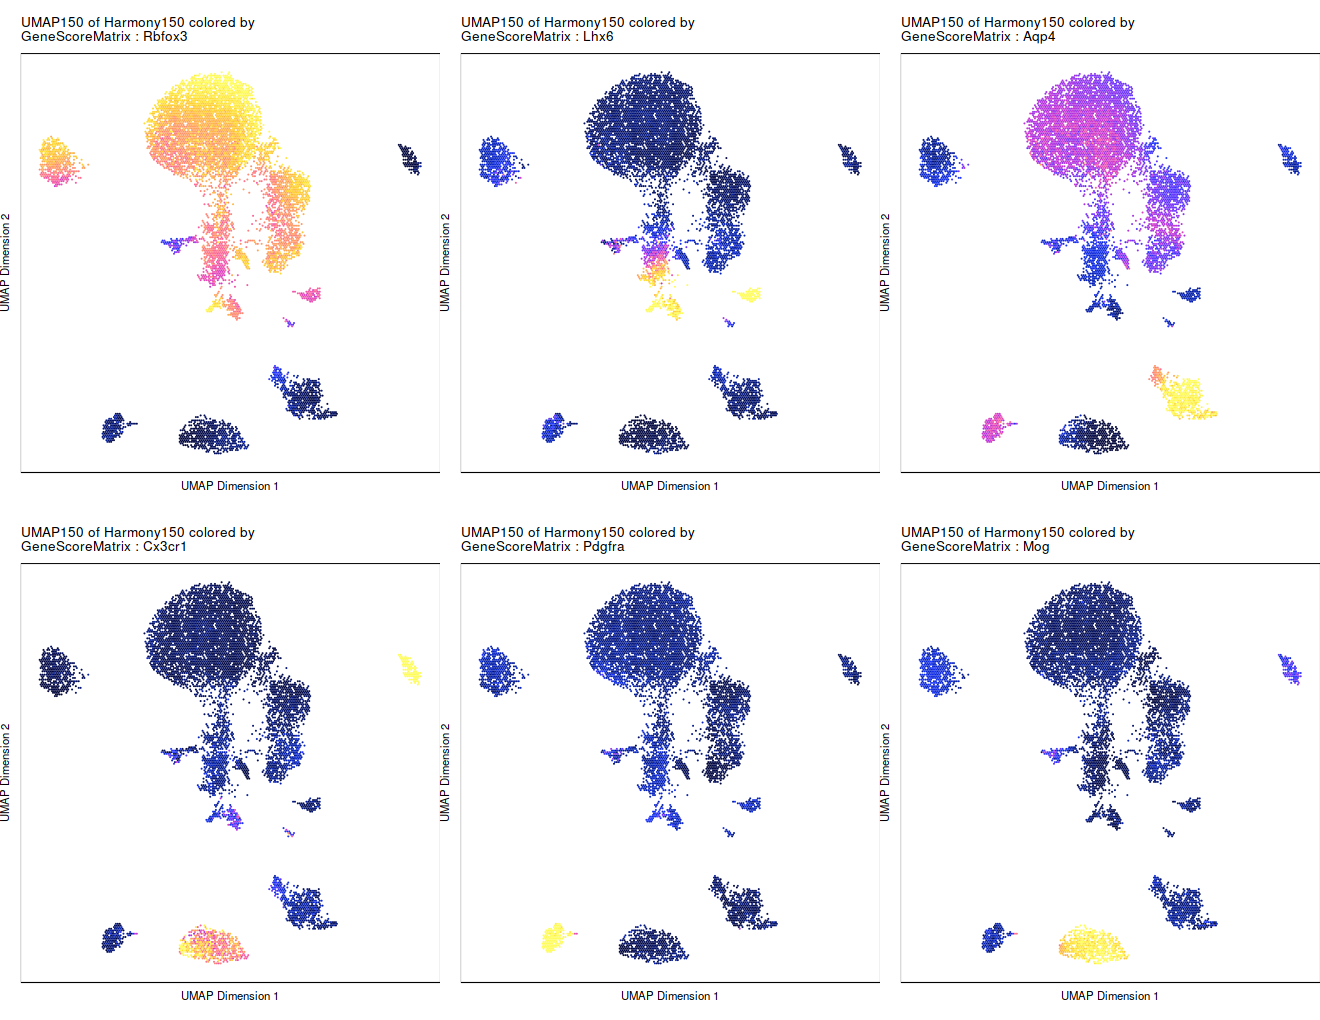

In [10]:
## Neuron vs. Glia markers
markerGenes1  <- c('Rbfox3', # Neuron
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' # Oligo
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP150", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f45b6e1750-Date-2021-01-30_Time-17-28-55.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 17:28:55 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f45b6e1750-Date-2021-01-30_Time-17-28-55.log



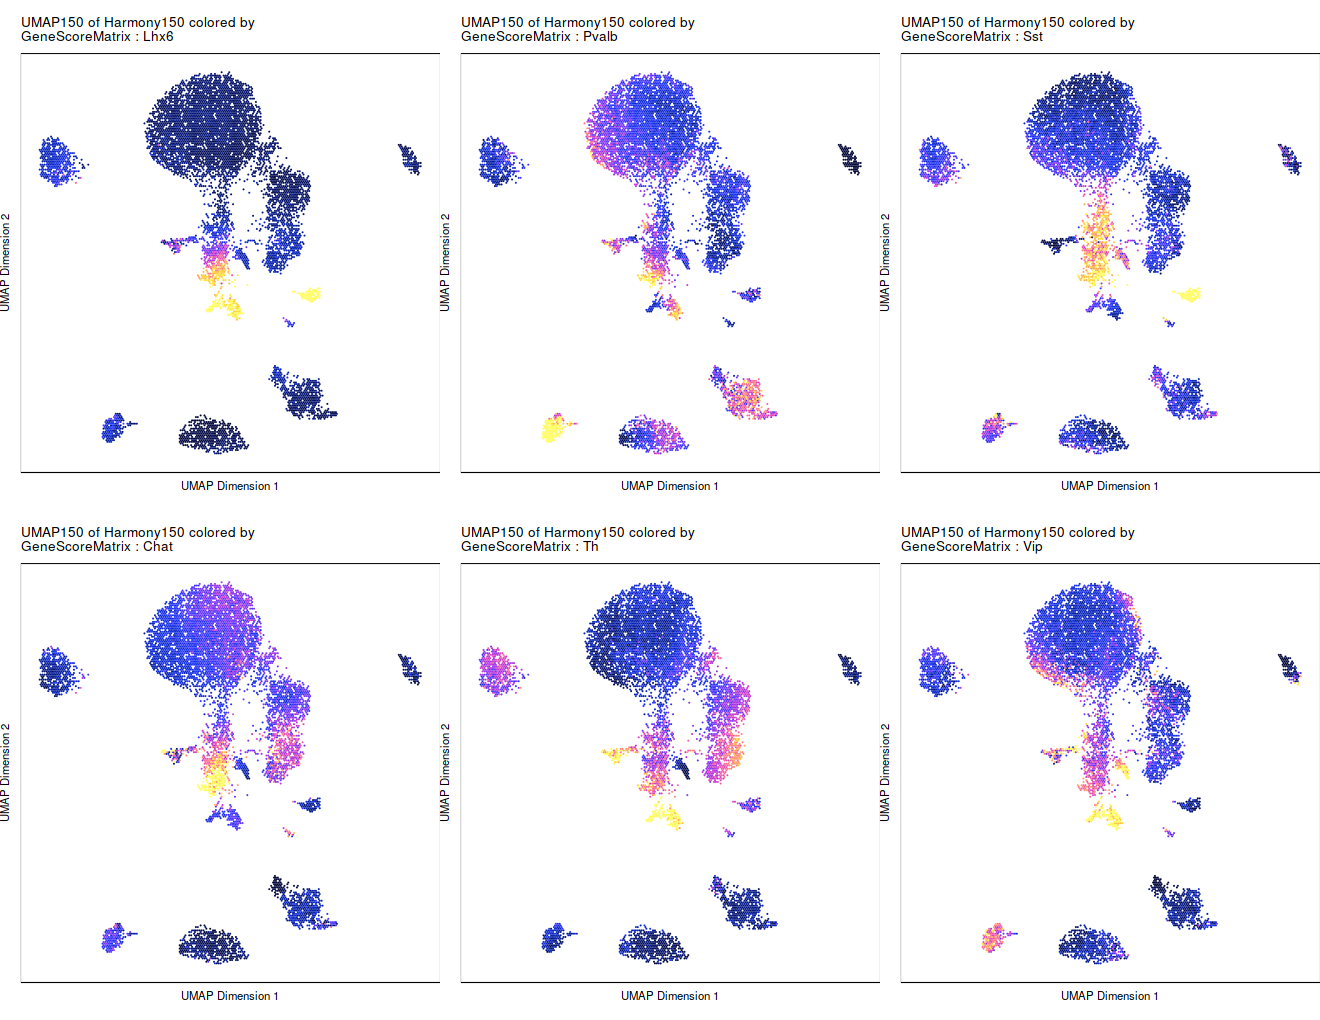

In [11]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix",
                    name = markerGenes1, embedding = "UMAPI150", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

# Relabel cluster and call peaks

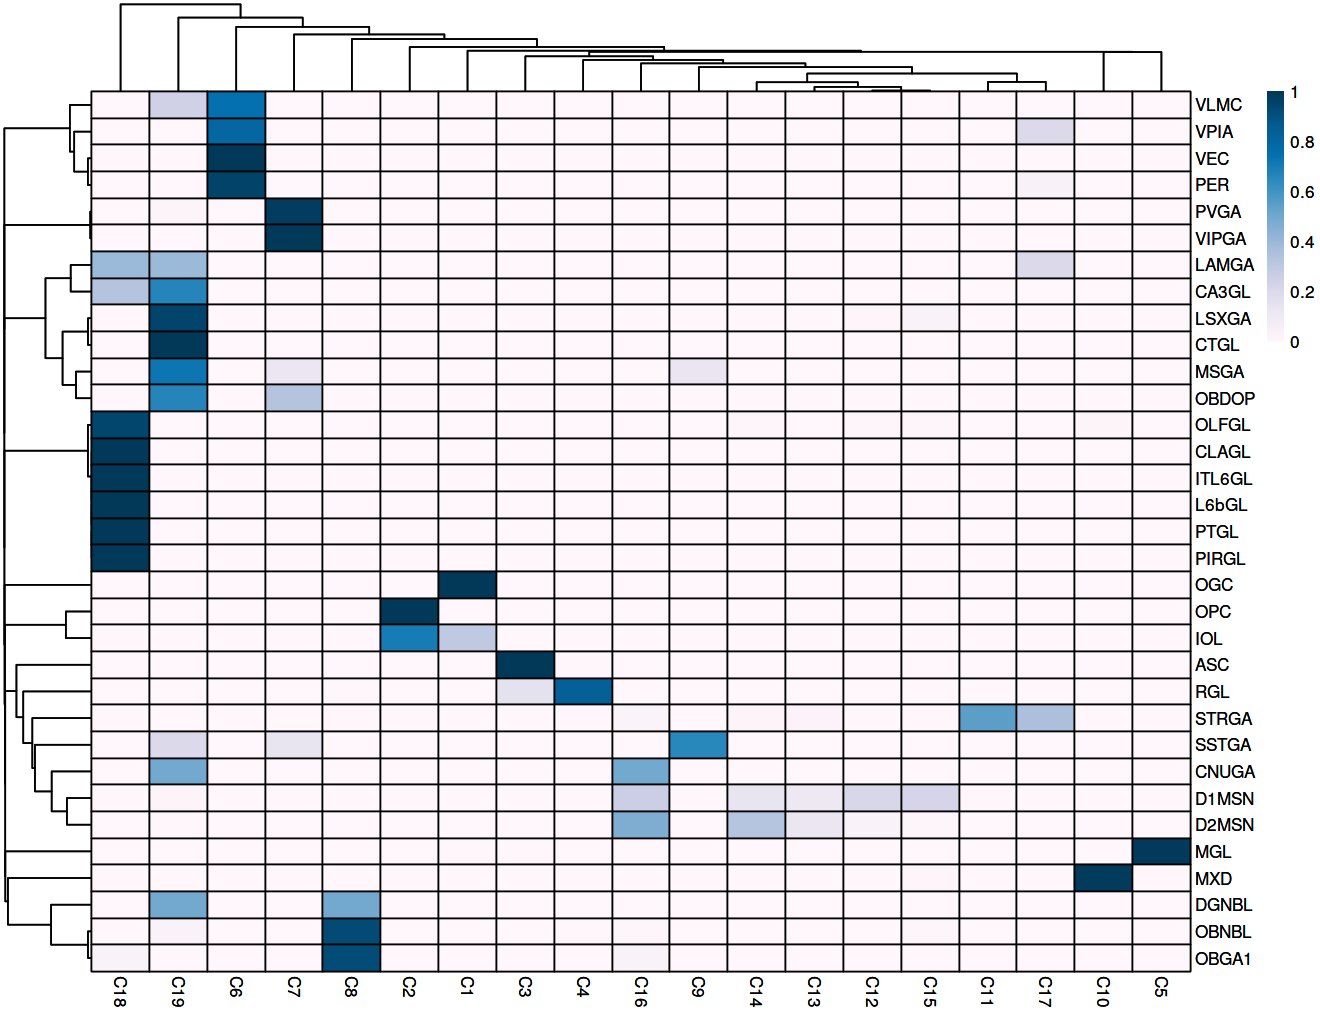

In [16]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$L2cluster), paste0(proj$Clusters150))
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [18]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' ='Oligo',
    'C2' ='OPC',
    'C3' ='Astro',
    'C4' ='Astro',
    'C5' ='Microglia',
    'C6' ='VLMC',
    'C7' ='Neuron', 
    'C8' ='Neuron',
    'C9' ='Neuron',
    'C10'='Neuron',
    'C11'='Neuron',
    'C12'='Neuron',
    'C13'='Neuron',
    'C14'='Neuron',
    'C15'='Neuron',
    'C16'='Neuron',
    'C17'='Neuron',
    'C18'='Neuron',
    'C19'='Neuron'
)
proj$Clusters2 <- mapLabels(proj$Clusters150, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)


    Astro Microglia    Neuron     Oligo       OPC      VLMC 
      813       212      9941       841       303        37 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-65f45e2d30a7-Date-2021-01-30_Time-17-42-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-65f45e2d30a7-Date-2021-01-30_Time-17-42-09.log



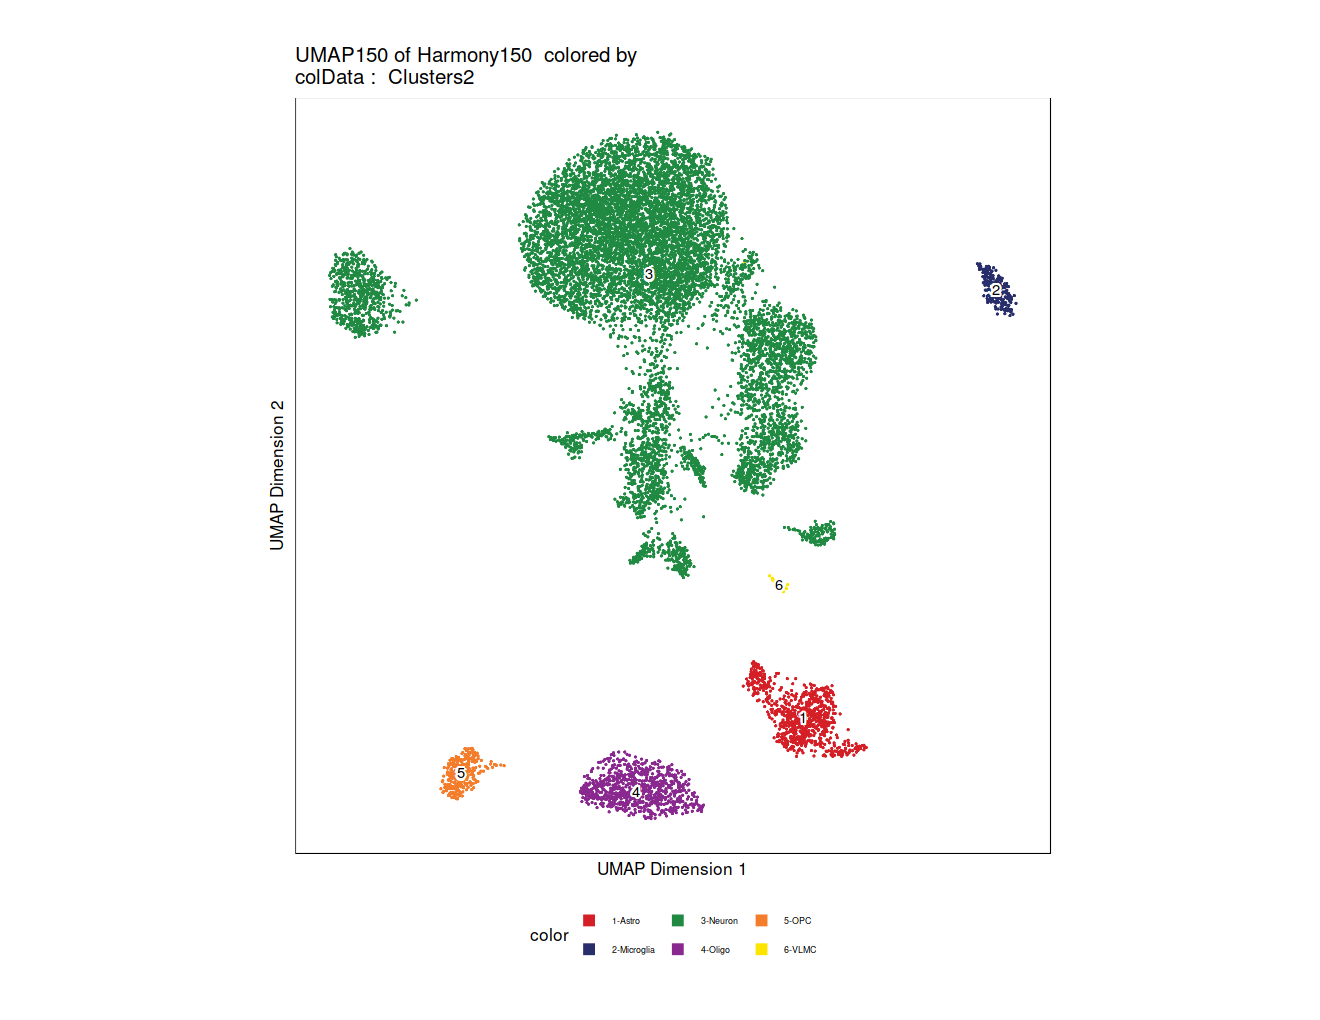

In [19]:
## make UMAP150 plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP150")
p1

In [23]:
# drop the drop clusters, pull out the neuron cell types
ARCHDIR2=file.path(PROJDIR,'ArchR_BICCN_CP1_Neuron')
idxSample <- BiocGenerics::which(proj$Clusters2 %in% "Neuron")
table(proj$Clusters150[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj, cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


 C10  C11  C12  C13  C14  C15  C16  C17  C18  C19   C7   C8   C9 
 636  957 1285  774 1022 1362 1810  612  123  813  236  176  135 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/machineLearningForComputationalBiology/snATAC_cross_species_caudate/data/raw_data/mm10/BICCN_mouse_caudoputamen/ArchR_BICCN_CP1_Neuron

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI150

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
            